In [1]:
#Description: This program predicts the price of Fb stock for a specific day


In [2]:
# import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#store and load data
df=pd.read_csv('FB.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-17,222.029999,222.289993,220.529999,222.139999,222.139999,15905900
1,2020-01-21,222.160004,222.369995,219.119995,221.440002,221.440002,14275800
2,2020-01-22,222.309998,222.750000,221.279999,221.320007,221.320007,12212800
3,2020-01-23,220.750000,221.490005,219.270004,219.759995,219.759995,11195000
4,2020-01-24,220.800003,221.779999,216.110001,217.940002,217.940002,11905800
...,...,...,...,...,...,...,...
247,2021-01-11,260.480011,263.470001,255.899994,256.839996,256.839996,30412300
248,2021-01-12,256.630005,259.720001,250.300003,251.089996,251.089996,26449900
249,2021-01-13,251.550003,253.949997,249.199997,251.639999,251.639999,19528900
250,2021-01-14,253.399994,255.029999,244.610001,245.639999,245.639999,29739400


In [4]:
#get the number of rows and columns
df.shape

(252, 7)

In [5]:
#Get and print the last row of data
actual_price=df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
251,2021-01-15,247.899994,253.860001,247.160004,251.360001,251.360001,24786100


In [6]:
#prepare the data for SVR models
# get all of the data excepts for the last row
df=df.head(len(df)-1)
#print the new data
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    2020-01-17  222.029999  222.289993  220.529999  222.139999  222.139999   
1    2020-01-21  222.160004  222.369995  219.119995  221.440002  221.440002   
2    2020-01-22  222.309998  222.750000  221.279999  221.320007  221.320007   
3    2020-01-23  220.750000  221.490005  219.270004  219.759995  219.759995   
4    2020-01-24  220.800003  221.779999  216.110001  217.940002  217.940002   
..          ...         ...         ...         ...         ...         ...   
246  2021-01-08  268.309998  268.950012  263.179993  267.570007  267.570007   
247  2021-01-11  260.480011  263.470001  255.899994  256.839996  256.839996   
248  2021-01-12  256.630005  259.720001  250.300003  251.089996  251.089996   
249  2021-01-13  251.550003  253.949997  249.199997  251.639999  251.639999   
250  2021-01-14  253.399994  255.029999  244.610001  245.639999  245.639999   

       Volume  
0    15905900  
1    14275800  
2  

In [7]:
#Create empty lists to store the independent and dependent data
days=list()
adj_close_prices=list()

In [8]:
#Get the dates and adjusted close prices
df_days=df.loc[:,'Date']
df_adj_close=df.loc[:,'Adj Close']
#print(df_days)

In [9]:
#Create the independent data set
#print(days)
for day in df_days:
    x=day[-2:]
    days.append([int(x)])

#Create the dependent data set
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

In [10]:
#print the days and adj close prices
print(days)
print(adj_close_prices)

[[17], [21], [22], [23], [24], [27], [28], [29], [30], [31], [3], [4], [5], [6], [7], [10], [11], [12], [13], [14], [18], [19], [20], [21], [24], [25], [26], [27], [28], [2], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [25], [26], [27], [30], [31], [1], [2], [3], [6], [7], [8], [9], [13], [14], [15], [16], [17], [20], [21], [22], [23], [24], [27], [28], [29], [30], [1], [4], [5], [6], [7], [8], [11], [12], [13], [14], [15], [18], [19], [20], [21], [22], [26], [27], [28], [29], [1], [2], [3], [4], [5], [8], [9], [10], [11], [12], [15], [16], [17], [18], [19], [22], [23], [24], [25], [26], [29], [30], [1], [2], [6], [7], [8], [9], [10], [13], [14], [15], [16], [17], [20], [21], [22], [23], [24], [27], [28], [29], [30], [31], [3], [4], [5], [6], [7], [10], [11], [12], [13], [14], [17], [18], [19], [20], [21], [24], [25], [26], [27], [28], [31], [1], [2], [3], [4], [8], [9], [10], [11], [14], [15], [16], [17], [18], [21], [22], [23], [24], [25

In [11]:
#create the 3 support vector regression models

#create and train a svr model using a linear kernal
lin_svr=SVR(kernel='linear')
lin_svr.fit(days,adj_close_prices)

#create and train a svr model using a polynomial kernal
poly_svr=SVR(kernel='poly',degree=2)
poly_svr.fit(days,adj_close_prices)

#create and train a svr model using a rbf kernal
rbf_svr=SVR(kernel='rbf',gamma=0.15)
rbf_svr.fit(days,adj_close_prices)

SVR(gamma=0.15)

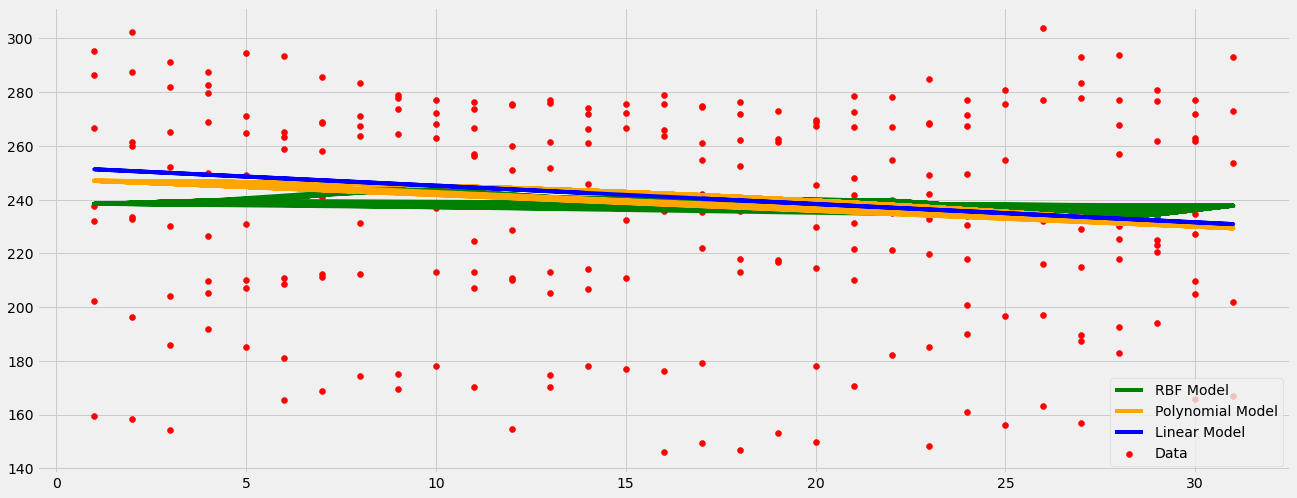

In [116]:
#plot the models on a graph 
plt.figure(figsize=(20,8))
plt.scatter(days,adj_close_prices,color='red',label='Data')
plt.plot(days,rbf_svr.predict(days),color='green',label='RBF Model')
plt.plot(days,poly_svr.predict(days),color='orange',label='Polynomial Model')
plt.plot(days,lin_svr.predict(days),color='blue',label='Linear Model')
plt.legend()
plt.show()

In [12]:
#show the predicted price for given day
day=[[24]]
print('The RBF SVR predicted:',rbf_svr.predict(day))
print('The Linear SVR predicted:',lin_svr.predict(day))
print('The Polynomial SVR predicted:',poly_svr.predict(day))


The RBF SVR predicted: [237.35343664]
The Linear SVR predicted: [235.64176594]
The Polynomial SVR predicted: [236.41433629]


In [13]:
# print the actual price of ten stock on 31 day
print('The actual price:',actual_price['Adj Close'])

The actual price: 251    251.360001
Name: Adj Close, dtype: float64
